# **PREPROCESSING: SCALING & ENCODING**

## Apply Several Preprocessing Method (with Ridge)

- Load Data
- Data splitting
- Prepropecessing
- Data transformation
- Model fitting and Evaluation
- Model properties

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import Ridge 
from sklearn.metrics import mean_squared_error

### Load Dataset

In [2]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


### Data Splitting

In [59]:
# define feature and target
X = df.drop(columns='tip')
y = df['tip']

In [60]:
# splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Preprocessing

Preprocess:
1. one hot encoding : sex, smoker, time
2. binary encoding : day
3. robust scaler : all features
4. no treatment : size

Random state 10, data splitting 70:30 model Ridge default


In [61]:
# !pip install category_encoders

In [62]:
# Scaler 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce 

In [63]:
X.head(3)

,total_bill,sex,smoker,day,time,size
0,16.99,Female,No,Sun,Dinner,2
1,10.34,Male,No,Sun,Dinner,3
2,21.01,Male,No,Sun,Dinner,3


In [64]:
# Encoding

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']), 
    ('binary', ce.BinaryEncoder(), ['day'])
], remainder='passthrough')

# ('nama preprocessing', method, kolom_yg_ingin_diencode)
# remainder='passthrough' agar kolom lain tetap ada

In [65]:
# Scaler
scaler = RobustScaler()

### Data Transformation

In [66]:
# fitting column transformer

# transformer.fit(X_train)

# X_train_prep = transformer.transform(X_train)
# X_test_prep = transformer.transform(X_test)

In [67]:
X_train_prep = transformer.fit_transform(X_train)
X_test_prep = transformer.transform(X_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [68]:
X_train_prep = pd.DataFrame(X_train_prep)
X_test_prep = pd.DataFrame(X_test_prep)

X_test_prep

,0,1,2,3,4,5,6,7
0,0.0,0.0,0.0,0.0,1.0,1.0,16.21,3.0
1,1.0,1.0,0.0,0.0,0.0,1.0,20.29,2.0
2,1.0,1.0,0.0,0.0,0.0,1.0,13.81,2.0
3,1.0,1.0,0.0,0.0,0.0,1.0,18.29,4.0
4,1.0,1.0,0.0,0.0,0.0,1.0,15.01,2.0
...,...,...,...,...,...,...,...,...
69,1.0,0.0,1.0,0.0,1.0,0.0,41.19,5.0
70,0.0,0.0,0.0,0.0,0.0,1.0,15.06,2.0
71,1.0,0.0,0.0,0.0,0.0,1.0,17.82,2.0
72,1.0,0.0,0.0,0.0,1.0,1.0,26.88,4.0


In [69]:
# scaling
X_train_prep_scaled = scaler.fit_transform(X_train_prep)
X_test_prep_scaled = scaler.transform(X_test_prep)

In [70]:
X_train_prep_scaled = pd.DataFrame(X_train_prep_scaled)
X_test_prep_scaled = pd.DataFrame(X_test_prep_scaled)

X_test_prep_scaled

,0,1,2,3,4,5,6,7
0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.106673,1.0
1,0.0,1.0,0.0,0.0,-1.0,0.0,0.263731,0.0
2,0.0,1.0,0.0,0.0,-1.0,0.0,-0.324557,0.0
3,0.0,1.0,0.0,0.0,-1.0,0.0,0.082161,2.0
4,0.0,1.0,0.0,0.0,-1.0,0.0,-0.215615,0.0
...,...,...,...,...,...,...,...,...
69,0.0,0.0,1.0,0.0,0.0,-1.0,2.161144,3.0
70,-1.0,0.0,0.0,0.0,-1.0,0.0,-0.211076,0.0
71,0.0,0.0,0.0,0.0,-1.0,0.0,0.039492,0.0
72,0.0,0.0,0.0,0.0,0.0,0.0,0.862006,2.0


In [71]:
transformer.transformers_

[('onehot', OneHotEncoder(drop='first'), ['sex', 'smoker', 'time']),
 ('binary', BinaryEncoder(), ['day']),
 ('remainder', 'passthrough', [0, 5])]

In [72]:
# Ambil nama kolom
transformer.transformers_[0][1].get_feature_names()

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_Male', 'x1_Yes', 'x2_Lunch'], dtype=object)

In [73]:
transformer.transformers_[1][1].get_feature_names()

['day_0', 'day_1', 'day_2']

In [74]:
X.columns[transformer.transformers_[2][2]]

Index(['total_bill', 'size'], dtype='object')

In [75]:
# menyatukan nama-nama kolom
features = list(transformer.transformers_[0][1].get_feature_names()) + list(transformer.transformers_[1][1].get_feature_names()) + list(X.columns[transformer.transformers_[2][2]])

# jadikan nama kolom pada dataframe
X_train_prep_scaled.columns = features
X_test_prep_scaled.columns = features

X_test_prep_scaled

,x0_Male,x1_Yes,x2_Lunch,day_0,day_1,day_2,total_bill,size
0,-1.0,0.0,0.0,0.0,0.0,0.0,-0.106673,1.0
1,0.0,1.0,0.0,0.0,-1.0,0.0,0.263731,0.0
2,0.0,1.0,0.0,0.0,-1.0,0.0,-0.324557,0.0
3,0.0,1.0,0.0,0.0,-1.0,0.0,0.082161,2.0
4,0.0,1.0,0.0,0.0,-1.0,0.0,-0.215615,0.0
...,...,...,...,...,...,...,...,...
69,0.0,0.0,1.0,0.0,0.0,-1.0,2.161144,3.0
70,-1.0,0.0,0.0,0.0,-1.0,0.0,-0.211076,0.0
71,0.0,0.0,0.0,0.0,-1.0,0.0,0.039492,0.0
72,0.0,0.0,0.0,0.0,0.0,0.0,0.862006,2.0


### Model fitting and evaluation

In [78]:
# define model
model = Ridge()

# fitting model
model.fit(X_train_prep_scaled, y_train)

# predict
y_pred = model.predict(X_test_prep_scaled)

# MSE
mean_squared_error(y_test, y_pred)

1.0290925846942338

### Model properties

In [81]:
list(X_train_prep_scaled)

['x0_Male',
 'x1_Yes',
 'x2_Lunch',
 'day_0',
 'day_1',
 'day_2',
 'total_bill',
 'size']

In [85]:
model.coef_

array([-0.14377876, -0.13594926,  0.14018555,  0.16320128,  0.0264468 ,
        0.06667219,  1.16909042,  0.12505467])

In [87]:
model_coef = pd.DataFrame({
    'feature': list(X_train_prep_scaled),
    'coef': model.coef_
})

model_coef

,feature,coef
0,x0_Male,-0.143779
1,x1_Yes,-0.135949
2,x2_Lunch,0.140186
3,day_0,0.163201
4,day_1,0.026447
5,day_2,0.066672
6,total_bill,1.169090
7,size,0.125055


<AxesSubplot:xlabel='feature', ylabel='coef'>

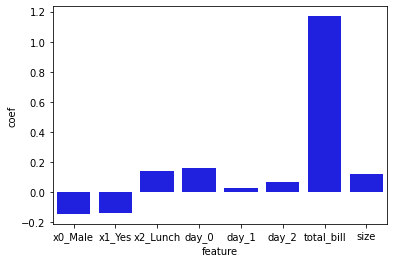

In [89]:
sns.barplot(data=model_coef, x='feature', y='coef', color='b')

**Mengetahui kolom hasil binary encoding**


In [95]:
X_train['day'].drop_duplicates()

39      Sat
87     Thur
176     Sun
99      Fri
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [97]:
X_train_prep_scaled[['day_0','day_1','day_2']].drop_duplicates()

,day_0,day_1,day_2
0,0.0,-1.0,0.0
1,0.0,0.0,-1.0
11,0.0,0.0,0.0
34,1.0,-1.0,-1.0


## Apply Several Preprocessing Method (with Decision Tree)

preprocess v2:
1. one hot encoding : sex, smoker
2. ordinal encoding : time, day
3. no treatment : size, total_bill

Random state 10, data splitting 70:30 model Tree(max depth 3)


### Load Dataset

In [226]:
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Data Splitting

In [227]:
X = df.drop(columns='tip')
y = df['tip']

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

### Preprocessing

preprocess v2:
1. one hot encoding : sex, smoker
2. ordinal encoding : time, day
3. no treatment : size, total_bill

In [229]:
# df.groupby('day')['tip'].sum()

In [230]:
# ordinal mapping

ordinal_mapping = [
    {'col':'day', 'mapping':{None:0, 'Thur':1, 'Fri':2, 'Sat':3, 'Sun':4} },
    {'col':'time', 'mapping':{None:0, 'Lunch':1, 'Dinner':2} }
]

ordinal_encoder = ce.OrdinalEncoder(cols=['day', 'time'], mapping=ordinal_mapping)

In [231]:
# Column Transformer 

transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(), ['sex','smoker']),
    ('ordinal', ordinal_encoder, ['day', 'time'])
], remainder='passthrough')

In [232]:
# Scaler
scaler = StandardScaler()

### Data Transformation

In [233]:
# column transformer
X_train_prep = transformer.fit_transform(X_train)
X_test_prep = transformer.transform(X_test)

C:\Users\LENOVO\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [234]:
# scaling
X_train_prep_scaled = scaler.fit_transform(X_train_prep)
X_test_prep_scaled = scaler.transform(X_test_prep)

In [235]:
X_train_prep_scaled = pd.DataFrame(X_train_prep_scaled)
X_test_prep_scaled = pd.DataFrame(X_test_prep_scaled)

X_train_prep_scaled

,0,1,2,3,4,5,6,7
0,-0.767323,0.767323,0.748086,-0.748086,0.244643,0.627250,1.347073,0.466653
1,-0.767323,0.767323,0.748086,-0.748086,-1.488247,-1.594261,-0.160033,-0.577176
2,1.303232,-1.303232,-1.336744,1.336744,0.244643,0.627250,-1.047590,-0.577176
3,-0.767323,0.767323,0.748086,-0.748086,0.244643,0.627250,-0.933890,-0.577176
4,1.303232,-1.303232,0.748086,-0.748086,-1.488247,-1.594261,-0.374671,-0.577176
...,...,...,...,...,...,...,...,...
165,-0.767323,0.767323,0.748086,-0.748086,0.244643,0.627250,-0.240087,0.466653
166,-0.767323,0.767323,0.748086,-0.748086,1.111089,0.627250,0.222834,-0.577176
167,-0.767323,0.767323,0.748086,-0.748086,0.244643,0.627250,-0.740135,-0.577176
168,1.303232,-1.303232,0.748086,-0.748086,-1.488247,-1.594261,1.176523,3.598140


In [236]:
# ambil nama kolom
transformer.transformers_[0][1].get_feature_names()

C:\Users\LENOVO\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


array(['x0_Female', 'x0_Male', 'x1_No', 'x1_Yes'], dtype=object)

In [237]:
transformer.transformers_[1][1].get_feature_names()

['day', 'time']

In [238]:
X_train.columns[transformer.transformers_[2][2]]

Index(['total_bill', 'size'], dtype='object')

In [239]:
# menyatukan nama-nama features

features = list(transformer.transformers_[0][1].get_feature_names()) + list(transformer.transformers_[1][1].get_feature_names()) + list(X_train.columns[transformer.transformers_[2][2]])

X_train_prep_scaled.columns = features
X_test_prep_scaled.columns = features

X_test_prep_scaled

,x0_Female,x0_Male,x1_No,x1_Yes,day,time,total_bill,size
0,1.303232,-1.303232,0.748086,-0.748086,1.111089,0.627250,-0.400196,0.466653
1,-0.767323,0.767323,-1.336744,1.336744,0.244643,0.627250,0.073168,-0.577176
2,-0.767323,0.767323,-1.336744,1.336744,0.244643,0.627250,-0.678645,-0.577176
3,-0.767323,0.767323,-1.336744,1.336744,0.244643,0.627250,-0.158873,1.510482
4,-0.767323,0.767323,-1.336744,1.336744,0.244643,0.627250,-0.539420,-0.577176
...,...,...,...,...,...,...,...,...
69,-0.767323,0.767323,0.748086,-0.748086,-1.488247,-1.594261,2.497996,2.554311
70,1.303232,-1.303232,0.748086,-0.748086,0.244643,0.627250,-0.533619,-0.577176
71,-0.767323,0.767323,0.748086,-0.748086,0.244643,0.627250,-0.213403,-0.577176
72,-0.767323,0.767323,0.748086,-0.748086,1.111089,0.627250,0.837743,1.510482


In [240]:
X_test_prep_scaled['day'].drop_duplicates()

0     1.111089
1     0.244643
5    -1.488247
37   -0.621802
Name: day, dtype: float64

In [241]:
X_test['day'].drop_duplicates()

162     Sun
60      Sat
83     Thur
220     Fri
Name: day, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

### Model fitting and evaluation

In [242]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

In [249]:
model = DecisionTreeRegressor(max_depth=3, random_state=10)

model.fit(X_train_prep_scaled, y_train)

y_pred = model.predict(X_test_prep_scaled)

mean_squared_error(y_test, y_pred)

0.8292584375206998

### Model properties

In [250]:
model.feature_importances_

array([0.        , 0.        , 0.        , 0.10105174, 0.        ,
       0.        , 0.89654532, 0.00240294])

In [251]:
list(X_train_prep_scaled)

['x0_Female',
 'x0_Male',
 'x1_No',
 'x1_Yes',
 'day',
 'time',
 'total_bill',
 'size']

In [252]:
model_importance = pd.DataFrame({
    'feature': list(X_train_prep_scaled),
    'importance': model.feature_importances_
}).sort_values('importance')

model_importance

,feature,importance
0,x0_Female,0.000000
1,x0_Male,0.000000
2,x1_No,0.000000
4,day,0.000000
5,time,0.000000
7,size,0.002403
3,x1_Yes,0.101052
6,total_bill,0.896545


<AxesSubplot:xlabel='feature', ylabel='importance'>

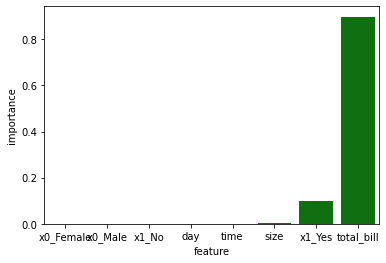

In [253]:
sns.barplot(data=model_importance, x='feature', y='importance', color='g')

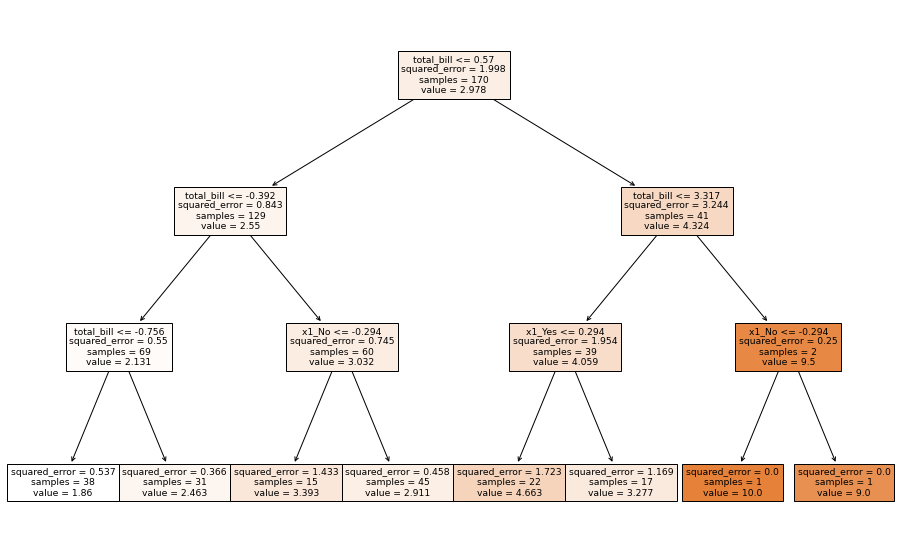

In [248]:
plt.figure(figsize=(16,10))
plot_tree(model, feature_names=features, filled=True)
plt.show()

# **EXERCISE: PREPROCESSING (SCALING & ENCODING)**

Pada latihan kali ini, kita akan menggunakan beberapa metode yang telah kita pelajari:

- Encoding
- Scaling
- Regularization
<br><br>

**Gunakan melb_data.csv (Melbourne House Data) dengan:**
- Features: 'Suburb', 'Rooms', 'Type', 'Method', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname'
- Target: 'Price'

**Lakukan tahapan ini pada preprocessing dan modeling:**
- Lakukan EDA secara sederhana untuk eksplorasi dataset.
- Splitting dataset dengan proporsi 80:20 dan random_state = 2020
- Gunakan ColumnTransformer untuk encoding.
    - Ada 5 features categorical. Lakukan encoding pada features tersebut sesuai dengan karakter masing-masing feature.
- Lakukan Scaling pada numerical features. Pilih scaler yang menurut kamu paling sesuai berdasarkan karakteristik datanya.
- Lakukan fitting model dan evaluasi dengan metode Lasso pada data yang telah dilakukan preprocessing.
